# Homework 4: Data Visualization
- **Name**:  Amila Viraj Mahinda Hewa Lunuwilage
- **UB Username**: amilavir
- **UB Person Number**:  50548192

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

In [2]:
# raed scatter data.csv
df = pd.read_csv('scatter_data.csv')
df.head()

,% x,y
0,95.954341,328.375777
1,60.162754,259.053445
2,52.754898,207.792989
3,88.034798,333.209632
4,80.271275,290.042475


In [3]:
df.shape

(100, 2)

In [4]:
# remove the percent sign (%) if appear in any row or column name, (which denotes a comment)
df.columns = df.columns.str.replace('%', '')
df.columns = df.columns.str.replace(' ', '')
df.head()


,x,y
0,95.954341,328.375777
1,60.162754,259.053445
2,52.754898,207.792989
3,88.034798,333.209632
4,80.271275,290.042475


In [5]:
df.columns

Index(['x', 'y'], dtype='object')

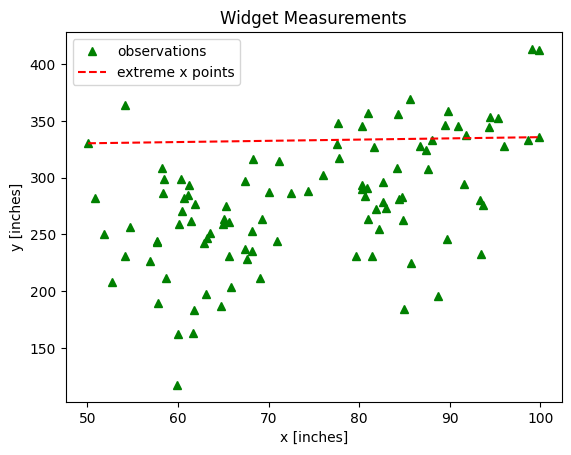

In [6]:
# plot the data points as green triangles
plt.plot(df['x'], df['y'], 'g^')

# plot a line from the minimum x-value to the maximum x-value. The line should be dashed and colored red
plt.plot([df['x'].min(), df['x'].max()], [df.loc[df['x'].idxmin(), 'y'], df.loc[df['x'].idxmax(), 'y']], 'r--')

# include a title for your plot
plt.title('Widget Measurements')

# label the x- and y-axes
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')

# include a legend for your plot
plt.legend(['observations', 'extreme x points'])


### Problem 2 - Histogram

In [7]:
# read data student grades.csv
# df = pd.read_csv('student_grades.csv')
df = pd.read_csv('student_grades.csv', comment='%',
                   names=['student_id', 'average_score'])
df.head()

,student_id,average_score
0,0,81.563259
1,1,67.426527
2,2,86.415197
3,3,80.387361
4,4,76.669249


In [8]:
df.shape

(75, 2)

In [9]:
# define bins and labels
bins = [0, 60, 70, 80, 90, 100]
labels = ['F', 'D', 'C', 'B', 'A']

In [10]:
df['Grade'] = pd.cut(df['average_score'], bins=bins, labels=labels, right=False)

In [11]:
df.head()

,student_id,average_score,Grade
0,0,81.563259,B
1,1,67.426527,D
2,2,86.415197,B
3,3,80.387361,B
4,4,76.669249,C


In [12]:
df.shape

(75, 3)

In [13]:
# check the rows if average_score > 100
df[df['average_score'] > 100]

,student_id,average_score,Grade
5,5,100.106000,NaN
6,6,107.756273,NaN
8,8,101.762623,NaN
74,74,100.021837,NaN


In [14]:
# check the rows if average_score < 0
df[df['average_score'] < 0]

,student_id,average_score,Grade


In [15]:
df['Grade'].value_counts(sort=False)

Grade
F     3
D    14
C    21
B    28
A     5
Name: count, dtype: int64

In [16]:
counts = df['Grade'].value_counts(sort=False)

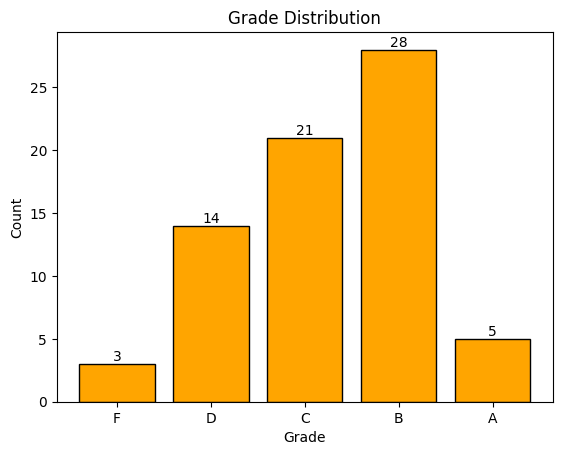

In [17]:
# histogram without sorting
bars = plt.bar(counts.index, counts.values, color='orange', edgecolor='black')

# add counts above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', ha='center')

# # customize the x-axis labels
# plt.xticks(range(len(labels)), labels)

plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')

plt.show()

### Problem 3 - Barplot and Boxplot in the Same Figure

In [18]:
import seaborn as sns

# Reading the data from the CSV file, ignoring rows that begin with '%'
df = pd.read_csv('solution_data.csv')
df.columns = df.columns.str.replace('%', '')
df.columns = df.columns.str.replace(' ', '')
df.head()

,Problem,SolnMethod,Value
0,0,genetic algorithm,112.749860
1,0,simulated annealing,75.220917
2,0,tabu search,111.574225
3,0,optimal,166.170172
4,1,genetic algorithm,31.819762


In [19]:
df.columns

Index(['Problem', 'SolnMethod', 'Value'], dtype='object')

In [20]:
# # Removing leading and trailing '|' from SolnMethod
# df['SolnMethod'] = df['SolnMethod'].str.strip('|')
# df.head()

In [21]:
# get the problem wise optimal value
df['OptimalOFV'] = df.groupby('Problem')['Value'].transform(lambda x: x.loc[df['SolnMethod'] == 'optimal'].iloc[0])

In [22]:
df.head()

,Problem,SolnMethod,Value,OptimalOFV
0,0,genetic algorithm,112.749860,166.170172
1,0,simulated annealing,75.220917,166.170172
2,0,tabu search,111.574225,166.170172
3,0,optimal,166.170172,166.170172
4,1,genetic algorithm,31.819762,48.634470


In [23]:
# calculate the optimality gap for each heuristic
df['optimality_gap'] = (df['OptimalOFV'] - df['Value']) / df['OptimalOFV'] * 100

In [24]:
# Filter data for specified heuristics
filtered_df = df[df['SolnMethod'].isin(['genetic algorithm', 'simulated annealing', 'tabu search'])]

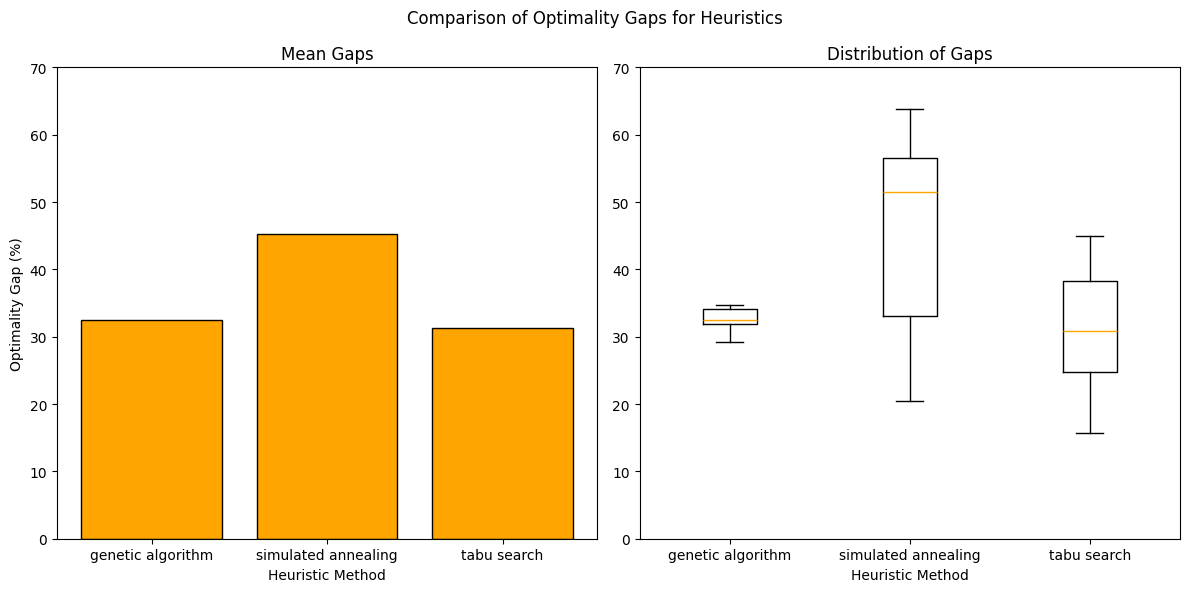

In [25]:
# Create the figure and the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for the first subplot (bar plot)
axs[0].bar(filtered_df['SolnMethod'].unique(), filtered_df.groupby('SolnMethod')['optimality_gap'].mean(), color='orange', edgecolor='black')
axs[0].set_title('Mean Gaps')
axs[0].set_xlabel('Heuristic Method')
axs[0].set_ylabel('Optimality Gap (%)')
axs[0].set_yticks(range(0, int(filtered_df['optimality_gap'].max()) + 10, 10))

# Plot for the second subplot (box plot)
axs[1].boxplot([filtered_df[filtered_df['SolnMethod'] == method]['optimality_gap'] for method in filtered_df['SolnMethod'].unique()], 
               labels=filtered_df['SolnMethod'].unique(), medianprops=dict(color='orange'))
axs[1].set_title('Distribution of Gaps')
axs[1].set_xlabel('Heuristic Method')
axs[1].set_yticks(range(0, int(filtered_df['optimality_gap'].max()) + 10, 10))

# Set the same y-axis scale for both subplots
ylim = axs[1].get_ylim()
axs[0].set_ylim(ylim)

# Adjust layout
plt.suptitle('Comparison of Optimality Gaps for Heuristics')
plt.tight_layout()
plt.show()


--- 
## Part 2 - Explore New Plot Types

A spider chart, also known as a radar chart, is a powerful visualization tool that allows us to compare multiple quantitative variables across different categories. In this case, I'm interested in exploring the relationship between the 'Order_Quantity', 'Sales', and 'Profit' columns concerning different customer segments as I explained below.

- **URL of Example Code**:  https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html#sphx-glr-gallery-specialty-plots-radar-chart-py
- **URL of Sample Data**:  https://www.kaggle.com/datasets/anuvagoyal/sales-store-product-details

In [26]:
# read csv file
df2 = pd.read_csv('Salesstore.csv')
df2.head()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


In [27]:
# unique values in each column
df2.nunique()

Order_ID                571
Order_Priority            5
Order_Quantity           50
Sales                   729
Ship_Mode                 2
Profit                  727
Customer_Name           173
Region                    6
Customer_Segment          4
Product_Category          3
Product_Sub-Category     15
Product_Name            445
Product_Container         3
dtype: int64

In [28]:
# get unique values for order priority
df2['Order_Priority'].unique()

array(['High', 'Not Specified', 'Low', 'Medium', 'Critical'], dtype=object)

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_ID              730 non-null    int64  
 1   Order_Priority        730 non-null    object 
 2   Order_Quantity        730 non-null    int64  
 3   Sales                 730 non-null    float64
 4   Ship_Mode             730 non-null    object 
 5   Profit                730 non-null    float64
 6   Customer_Name         730 non-null    object 
 7   Region                730 non-null    object 
 8   Customer_Segment      730 non-null    object 
 9   Product_Category      730 non-null    object 
 10  Product_Sub-Category  730 non-null    object 
 11  Product_Name          730 non-null    object 
 12  Product_Container     730 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 74.3+ KB


In [30]:
# Filter numerical columns for spider chart
numeric_columns = ['Order_Quantity', 'Sales', 'Profit']

# Group data by Customer Segment
df_segment = df2.groupby('Customer_Segment')[numeric_columns].mean().reset_index()

In [31]:
df_segment.head()

,Customer_Segment,Order_Quantity,Sales,Profit
0,Consumer,24.307190,1215.955693,121.839673
1,Corporate,24.820463,1554.716456,231.865714
2,Home Office,26.806452,2269.778371,374.817419
3,Small Business,26.392857,1260.007589,39.021071


In [32]:
# Normalize the data
max_values = df_segment[numeric_columns].max()
df_normalized = df_segment.copy()
df_normalized[numeric_columns] = df_normalized[numeric_columns] / max_values

In [33]:
df_normalized.head()

,Customer_Segment,Order_Quantity,Sales,Profit
0,Consumer,0.906766,0.535716,0.325064
1,Corporate,0.925914,0.684964,0.618610
2,Home Office,1.000000,1.000000,1.000000
3,Small Business,0.984571,0.555124,0.104107


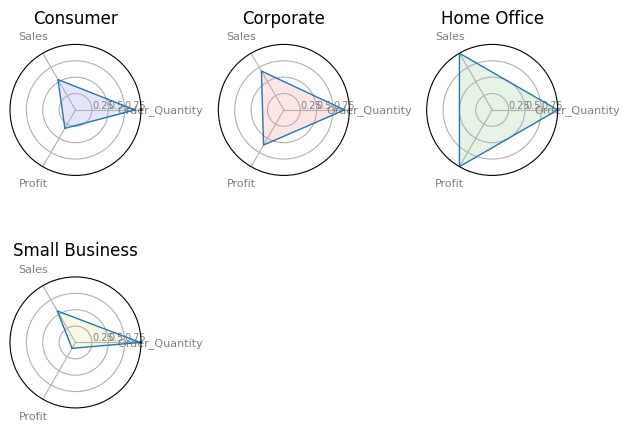

In [34]:
# create a spider chart for each customer segment

# number of variable
categories = list(df_normalized)[1:]
N = len(categories)

# create a list with the average of all features
values = df_normalized.loc[0].drop('Customer_Segment').values.flatten().tolist()
values += values[:1]
# calculate the angle for each axis
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
# initialize the spider plot
ax = plt.subplot(2, 3, 1, polar=True)
# draw one axis per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=7)
plt.ylim(0, 1)
# plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
# fill area
ax.fill(angles, values, 'b', alpha=0.1)
# add a title
plt.title(df_normalized['Customer_Segment'][0])

# repeat the same steps for the next 5 customer segments
values = df_normalized.loc[1].drop('Customer_Segment').values.flatten().tolist()
values += values[:1]
ax = plt.subplot(2, 3, 2, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=7)
plt.ylim(0, 1)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
plt.title(df_normalized['Customer_Segment'][1])

values = df_normalized.loc[2].drop('Customer_Segment').values.flatten().tolist()
values += values[:1]
ax = plt.subplot(2, 3, 3, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=7)
plt.ylim(0, 1)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'g', alpha=0.1)
plt.title(df_normalized['Customer_Segment'][2])

values = df_normalized.loc[3].drop('Customer_Segment').values.flatten().tolist()
values += values[:1]
ax = plt.subplot(2, 3, 4, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=7)
plt.ylim(0, 1)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'y', alpha=0.1)
plt.title(df_normalized['Customer_Segment'][3])

# Adjust layout
plt.tight_layout()
plt.show()


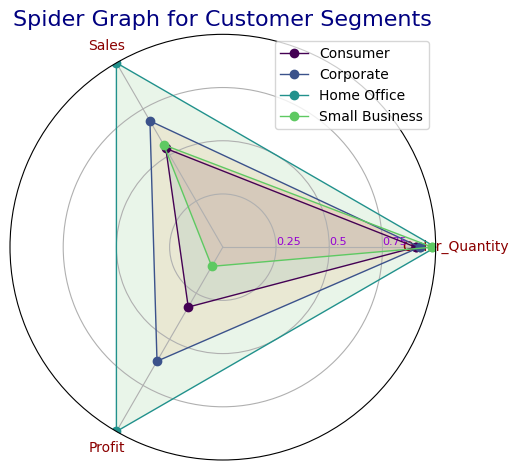

In [35]:
# Plot all categories in the same spider figure
# number of variables
categories = list(df_normalized)[1:]
N = len(categories)

# spider plot for each category
plots = []
labels = []
for i in range(len(df_normalized)):
    values = df_normalized.loc[i].drop('Customer_Segment').values.flatten().tolist()
    values += values[:1]

    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(1, 1, 1, polar=True)

    plt.xticks(angles[:-1], categories, color='darkred', size=10)
    ax.set_rlabel_position(0)
    plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="darkviolet", size=8)
    plt.ylim(0, 1)

    plot, = ax.plot(angles, values, linewidth=1, linestyle='solid', marker='o')
    plots.append(plot)
    labels.append(df_normalized['Customer_Segment'][i])

    # Color each plot differently
    plot.set_color(plt.cm.viridis(i / len(df_normalized)))

    # Fill the area
    ax.fill(angles, values, alpha=0.1)

# add legend for all categories
plt.legend(plots, labels, loc='upper right')

# add title
plt.title('Spider Graph for Customer Segments', color='navy', size=16)
plt.tight_layout()
plt.show()

A spider chart based on the 'Order_Quantity', 'Sales', and 'Profit' columns in relation to different customer segments can provide valuable insights that are crucial for understanding the dynamics of customer behavior and making data-driven decisions to improve business performance and customer satisfaction

Spider Chart Creation:

    - The spider chart is created using the matplotlib library in Python. It visualizes the 'Order_Quantity', 'Sales', and 'Profit' columns with respect to different customer segments.

    - The matplotlib.pyplot.subplots function is used to create a subplot with polar projection, which is ideal for a spider chart.

Customization of the Chart:

    - We can customize various aspects of the chart, such as figure size, line styles, fill transparency, and legend placement, to make the visualization more appealing and informative.
    - To change the figure size, adjust the figsize parameter inside the plt.subplots function.
    - To change the line styles, you can modify the parameters in the ax.plot function, such as line width, style, and color.
    - To adjust the transparency of the filled area, modify the alpha parameter inside the ax.fill function.
    - We can customize the legend placement by changing the location parameters in the ax.legend function.
    - To modify the font sizes, you can adjust the 'fontsize' parameter in the ax.set_thetagrids and ax.set_rlabel_position functions for the axis labels and the radial label position, respectively.

Color Customization:

    - We can change the colors of the lines and filled areas by specifying different color codes or names in the ax.plot and ax.fill functions.
    - For example, you can use the 'color' parameter in the ax.plot function to specify the color of the lines, and you can use the 'color' parameter in the ax.fill function to specify the fill color of the areas.

Scaling Adjustments:

    - If  want to adjust the scaling or limits of the axes, you can use the appropriate functions, such as ax.set_ylim or ax.set_rlim, to customize the range of the radial axis.
    - We can also modify the ax.set_rlabel_position function to change the radial label position.